In [1]:
import numpy as np
from source_helper import *
import matplotlib.pyplot as plt
% matplotlib inline
from time import time
from lapl_well import LaplWell

In [2]:
xwd = 0
ywd = 0
zwd = 0
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
params = {"nseg": 10, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":1}

In [3]:
well = LaplWell(xwd, ywd, zwd, outer_bound, top_bound, bottom_bound, wtype, params)

In [4]:
from helper import Helper

In [5]:
helper = Helper()

In [6]:
dummy_matrix = helper.get_dummy_matrix(well)
dummy_matrix

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  

In [7]:
s = 1
green_matrix = helper.get_green_matrix(well, s)
green_matrix

array([[ 0.        ,  0.34216444,  0.20495201,  0.15484761,  0.12362887,
         0.10150959,  0.08480333,  0.07169213,  0.06113654,  0.052483  ,
         0.04529233,  0.03925463,  0.03414294,  0.02978613,  0.02605207,
         0.02283685,  0.0200574 ,  0.01764651,  0.01554911,  0.01371974,
         0.0121205 ],
       [ 0.        ,  0.34216444,  0.34216444,  0.20495201,  0.15484761,
         0.12362887,  0.10150959,  0.08480333,  0.07169213,  0.06113654,
         0.052483  ,  0.04529233,  0.03925463,  0.03414294,  0.02978613,
         0.02605207,  0.02283685,  0.0200574 ,  0.01764651,  0.01554911,
         0.01371974],
       [ 0.        ,  0.20495201,  0.34216444,  0.34216444,  0.20495201,
         0.15484761,  0.12362887,  0.10150959,  0.08480333,  0.07169213,
         0.06113654,  0.052483  ,  0.04529233,  0.03925463,  0.03414294,
         0.02978613,  0.02605207,  0.02283685,  0.0200574 ,  0.01764651,
         0.01554911],
       [ 0.        ,  0.15484761,  0.20495201,  0.34216444

In [8]:
source_matrix = helper.get_source_matrix(well, s)
source_matrix

array([[ 0.        ,  0.03141593,  0.06283185,  0.09424778,  0.12566371,
         0.15707963,  0.18849556,  0.21991149,  0.25132741,  0.28274334,
         0.31415927,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.03141593,  0.06283185,  0.09424778,
         0.12566371,  0.15707963,  0.18849556,  0.21991149,  0.25132741,
         0.28274334,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.03141593,  0.06283185,
         0.09424778,  0.12566371,  0.15707963,  0.18849556,  0.21991149,
         0.25132741,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        

In [9]:
right_part = helper.get_right_part(well,10)

In [10]:
right_part

array([ 0.31415927,  0.28274334,  0.25132741,  0.21991149,  0.18849556,
        0.15707963,  0.12566371,  0.09424778,  0.06283185,  0.03141593,
        0.03141593,  0.06283185,  0.09424778,  0.12566371,  0.15707963,
        0.18849556,  0.21991149,  0.25132741,  0.28274334,  0.31415927,
        0.5       ])

In [11]:
s=1000
well.recalc(s)

In [12]:
well.p_lapl

0.0038066340725172849

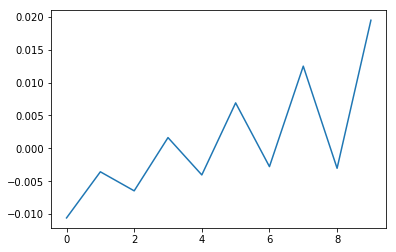

In [13]:
plt.plot(well.source_distrib)

In [14]:
from well import Well

In [15]:
params["ref_length"] = 1
params["z_ref_length"] = 1
real_well = Well(0,0,"infinite","imp", "imp", "frac", params)

In [16]:
real_well.get_pw(1)

3.8066340725166037

In [17]:
tds = np.logspace(-3, 0, 30)

In [18]:
pws = []
for t in tds:
    pws.append(real_well.get_pw(t))

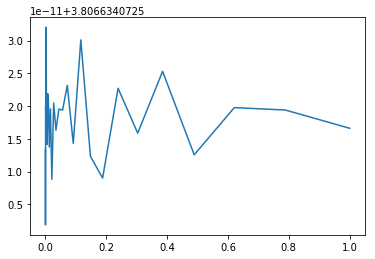

In [19]:
plt.plot(tds, pws)

## Testing old_helper

In [20]:
from source_helper import calc_bessel_integrals

In [21]:
s = 1
omega = 1
l = 1
N = 10
bsls = calc_bessel_integrals(s, omega, l, N)

In [22]:
bsls

array([ 0.        ,  0.34216444,  0.20495201,  0.15484761,  0.12362887,
        0.10150959,  0.08480333,  0.07169213,  0.06113654,  0.052483  ,
        0.04529233,  0.03925463,  0.03414294,  0.02978613,  0.02605207,
        0.02283685,  0.0200574 ,  0.01764651,  0.01554911,  0.01371974,
        0.0121205 ])

In [23]:
from old_helper import OldHelper

In [24]:
old_helper = OldHelper()

In [25]:
grn_old = old_helper.get_green_matrix(well, s)

In [26]:
grn_old

array([[ 0.        ,  0.27355822,  0.24850603,  0.16429044,  0.1281786 ,
         0.1042161 ,  0.08660086,  0.07296994,  0.06208756,  0.05321443,
         0.04586881],
       [ 0.        ,  0.17989981,  0.23289666,  0.22183702,  0.14487767,
         0.11326987,  0.09238271,  0.07699629,  0.06504783,  0.05547338,
         0.04763974],
       [ 0.        ,  0.13923824,  0.1532308 ,  0.21348389,  0.20692829,
         0.13304427,  0.1036653 ,  0.0844606 ,  0.07038211,  0.05947314,
         0.05073913],
       [ 0.        ,  0.11256923,  0.11982547,  0.13832207,  0.20165049,
         0.19732372,  0.12512217,  0.09705112,  0.07888591,  0.06564786,
         0.0554277 ],
       [ 0.        ,  0.09315646,  0.0976605 ,  0.10799208,  0.1287175 ,
         0.19372838,  0.19070954,  0.11954747,  0.09231687,  0.07484047,
         0.06217322],
       [ 0.        ,  0.07824773,  0.08132306,  0.08805594,  0.10006997,
         0.12210332,  0.18815369,  0.18597529,  0.11550204,  0.08884223,
         0.071

In [27]:
src_old = old_helper.get_source_matrix(well, s)

In [28]:
src_old

array([[ 0.        ,  0.03141593,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.06283185,  0.03141593,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.09424778,  0.06283185,  0.03141593,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.12566371,  0.09424778,  0.06283185,  0.03141593,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.15707963,  0.12566371,  0.09424778,  0.06283185,
         0.03141593,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.18849556,  0.15707963,  0.12566371,  0.09424778,
         0.06283185,  0.03141593,  0.        ,  0.        ,  0.        ,
         0.   

In [29]:
right_old = old_helper.get_right_part(well, s=7)

In [30]:
right_old

array([ 0.0448799 ,  0.08975979,  0.13463969,  0.17951958,  0.22439948,
        0.26927937,  0.31415927,  0.35903916,  0.40391906,  0.44879895,
        1.42857143])

In [31]:
old_helper.get_dummy_matrix(well)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [32]:
from lapl_well import LaplWell

In [33]:
lapl_well = LaplWell(xwd, ywd, zwd, outer_bound, top_bound, bottom_bound, wtype, params)

In [34]:
lapl_well.recalc(1)

In [35]:
lapl_well.p_lapl

3.8066340725172876

1